# <center> Transportation Need Assessment in Minnesota
    
<img src="transportation.jpg" style="width: 700px;">

## 1. Introduction

The objective of this project is to create a transportation need index to compare transportation need across the entire Minnesota. The purpose is to identify places where are in more need of transportation establishment or assistance for evacuation during emergencies. This project used eight identified population groups that are regarded as low mobility indicator, including age over 65, age under 14, persons below poverty line, unemployed, not labor, no vehicle available, persons with disabilities, and single parent with children under 18. The results show that places with higher transportation need are located around the Metro city of Minnesota and most of places in Minnesota are in the lower transportation need level.

## 2. Workflow

### 2.1 Import Python Modules

The modules used for this project includes `pandas`, `geopandas`, `numpy`, `folium`, `os`, `re`, `json`,`functools`, and `matplotlib`. 

`pandas`, `geopandas`, `matplotlib` and `folium` are major models used for this project.

In [1]:
# Import modules
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
import os
import re
import json
from functools import reduce
from matplotlib import pyplot as plt

### 2.2 Define Function to Calculate Indexes

Files represented eight variables were downloaded from U.S. Census Bureau in *CSV* format. Since the calculation process is identical and repetitive, the function is created to automate the calculation. 

In [2]:
# Define the function to calculate the index of identified group populations
def index_calculation(file, column, rename, index):
    # Read the csv file into the dataframe
    try:
        df = pd.read_csv(file, low_memory = False)
    except:
        print("File does not exist", file)
        exit()
    
    # Drop the first row as it contains inapplicable information 
    df.drop(df.index[0], inplace = True)
    
    # Slice out the needed columns
    df1 = df.loc[:, ["GEO.id2", column]]
    
    # Rename the column to make it easier to read and understand
    # Rename the column that will be used as foreign key for join
    df1.rename(columns = {column: rename, "GEO.id2": "GEOID"},
               inplace = True)
      
    # Convert the data types into the integer
    df1[rename] = df1[rename].astype("int")
    
    # Calculate the index based on normalization
    df1[index] = (df1[rename] - df1[rename].min()) / (df1[rename].max() - df1[rename].min())
    
    # Return the dataframe
    return df1

### 2.3 Call Function

Use the function defined above, each variable's index can be caucluated within a short time. However, only seven variables are able to calculate index using this function. 

#### 2.3.1 Calculate seven variables' indexs

In [3]:
# Call the function to calcuate poverty index
# Display first row to check if the result is correct 
path = os.path.join("Data", "People Below Poverty Line", 
                    "ACS_17_5YR_S1701_with_ann.csv")
Poverty = index_calculation(path, "HC01_MOE_VC01", 
                            "Poverty", "Poverty_index")

Poverty.head(1)

,GEOID,Poverty,Poverty_index
1,27001770100,101,0.105143


In [4]:
# Call the function to calculate single parent family with children under 18 index
# Display first row to check if the result is correct 
path = os.path.join("Data", "Single-Parent under 18", 
                    "ACS_17_5YR_B09002_with_ann.csv")
S_P_Under_18 = index_calculation(path, "HD01_VD08", 
                                 "S_P_Under_18", "S_P_Under_18_index")

S_P_Under_18.head(1)

,GEOID,S_P_Under_18,S_P_Under_18_index
1,27001770100,52,0.044444


In [5]:
# Call the function to calculate no vehicle index
# Display first row to check if the result is correct 
path = os.path.join("Data","Households with zero vehicles",
                    "ACS_17_5YR_DP04_with_ann.csv")
No_Vehicle = index_calculation(path, "HC01_VC85", 
                               "No_Vehicle", "No_Vehicle_index")

No_Vehicle.head(1)

,GEOID,No_Vehicle,No_Vehicle_index
1,27001770100,55,0.035761


In [6]:
# Call the function to calculate disabled index
# Display first row to check if the result is correct 
path = os.path.join("Data", "Disabled people",
                    "ACS_17_5YR_DP02_with_ann.csv")
Disabled = index_calculation(path, "HC01_VC106", 
                             "Disabled", "Disabled_index")

Disabled.head(1)

,GEOID,Disabled,Disabled_index
1,27001770100,406,0.27619


In [7]:
# Call the function to calculate not in labor index
# Display first row to check if the result is correct 
path = os.path.join("Data", "Unemployed & Not in labor force",
                    "ACS_17_5YR_B23025_with_ann.csv")
Not_labor = index_calculation(path, "HD01_VD07", 
                              "Not_labor", "Not_labor_index")

Not_labor.head(1)

,GEOID,Not_labor,Not_labor_index
1,27001770100,1086,0.219483


In [8]:
# Call the function to calculate unemployed index
# Display first row to check if the result is correct
path = os.path.join("Data","Unemployed & Not in labor force", 
                    "ACS_17_5YR_B23025_with_ann.csv")
Unemployed = index_calculation(path, "HD01_VD04", 
                               "Unemployed", "Unemployed_index")

Unemployed.head(1)

,GEOID,Unemployed,Unemployed_index
1,27001770100,833,0.092443


In [9]:
# Call the function to calculate age over 65 index
# Display first row to check if the result is correct
path = os.path.join("Data", "Over 65 & Under 18", 
                    "ACS_17_5YR_S0101_with_ann.csv")
Over_65 = index_calculation(path, "HC01_EST_VC33", 
                            "Over_65", "Over_65_index")

Over_65.head(1)

,GEOID,Over_65,Over_65_index
1,27001770100,717,0.379968


#### 2.3.2 Calculate Age Under 14 index

Since there is no total number of persons under age 14 in the data, it required to sum up this variable based on three age groups. Hence, it cannot use the predefined function to calculate the index.

In [10]:
# Read the csv file into the dataframe
path = os.path.join("Data","Over 65 & Under 18", 
                    "ACS_17_5YR_S0101_with_ann.csv")
df = pd.read_csv(path,low_memory = False)

# Drop the first row as it contains useless information 
df.drop(df.index[0], inplace = True)

# Slice out the needed columns 
df1 = df.loc[:, ["GEO.id2", "HC01_EST_VC03", 
                 "HC01_EST_VC04", "HC01_EST_VC05"]]

# Covert the data types into the integer
df2 = df1.astype({"HC01_EST_VC03":"int", 
                 "HC01_EST_VC04":"int", "HC01_EST_VC05":"int"})

# Add a new column based on the sum of the other columns
df2["Under_14"] = (df2.HC01_EST_VC03 + df2.HC01_EST_VC04 + df2.HC01_EST_VC05)

# Drop the columns that will not be used in later calculation
df2.drop(columns = ["HC01_EST_VC03", "HC01_EST_VC04", 
                    "HC01_EST_VC05"], inplace = True)

# Calculate the index based on normalization
df2["Under_14_index"] = (df2["Under_14"]-df2["Under_14"].min()) / (df2["Under_14"].max()-df2["Under_14"].min())

# Rename the column that will be used as foreign key for join
df2.rename(columns = {"GEO.id2":"GEOID"}, inplace = True)

# Copy to a new dataframe and Call the function
# Display first row to check if the result is correct
Under_14 = df2.copy()
Under_14.head(1)

,GEOID,Under_14,Under_14_index
1,27001770100,262,0.055923


### 2.4 Create Index Table by Census Tract

In order to merge all the above dataframes at once instead of merging one by one, the **_reduce()_** function defined in `functiontools` module is used. The **_reduce()_** function basically works by applying functions to all the elements in a list assinged to its argument. 

In [11]:
# Store all the dataframes to the new list
dfs = [Poverty, S_P_Under_18, No_Vehicle, Disabled, Not_labor, 
       Unemployed, Over_65, Under_14]

In [12]:
# Merge all the dataframes based on the identical column
T_needs_index = reduce(lambda left,right: 
                       pd.merge(left,right,on='GEOID'), dfs)

In [13]:
# Sum up all the sub indexes to generate the overall index
T_needs_index["Total_index"] = (T_needs_index.Poverty_index + 
                                T_needs_index.S_P_Under_18_index + 
                                T_needs_index.No_Vehicle_index + 
                                T_needs_index.Disabled_index + 
                                T_needs_index.Over_65_index + 
                                T_needs_index.Under_14_index + 
                                T_needs_index.Not_labor_index + 
                                T_needs_index.Unemployed_index)

In [14]:
# Normalize the overall index
# Display first five rows to check if the result is correct
T_needs_index["Scaled_index"] = (T_needs_index["Total_index"] - T_needs_index["Total_index"].min())/(T_needs_index["Total_index"].max() - T_needs_index["Total_index"].min())
T_needs_index.head()

,GEOID,Poverty,Poverty_index,S_P_Under_18,S_P_Under_18_index,No_Vehicle,No_Vehicle_index,Disabled,Disabled_index,Not_labor,Not_labor_index,Unemployed,Unemployed_index,Over_65,Over_65_index,Under_14,Under_14_index,Total_index,Scaled_index
0,27001770100,101,0.105143,52,0.044444,55,0.035761,406,0.276190,1086,0.219483,833,0.092443,717,0.379968,262,0.055923,1.209355,0.234921
1,27001770200,143,0.153143,109,0.093162,32,0.020806,404,0.274830,889,0.179669,846,0.093885,570,0.302067,351,0.074920,1.192482,0.231643
2,27001770300,182,0.197714,261,0.223077,153,0.099480,596,0.405442,1170,0.236459,1491,0.165464,883,0.467939,600,0.128068,1.923644,0.373673
3,27001770400,172,0.186286,87,0.074359,78,0.050715,585,0.397959,1353,0.273444,1250,0.138719,906,0.480127,358,0.076414,1.678024,0.325961
4,27001790501,93,0.096000,82,0.070085,36,0.023407,332,0.225850,905,0.182902,625,0.069360,651,0.344992,246,0.052508,1.065105,0.206900


In [15]:
# Export as a csv file
T_needs_index.to_csv("data/Transportation Needs Index by census tract.csv", 
                     index = False)

#### 2.4.1 Result Interpretation

The index is further classified into five level of transportation need ranging from lower to higher based on quantile classification. In the cells below, percentage of each need level  is calculated and a pie chart is drawn to illustrate the result.

In [16]:
# Define a function to calculate percentage of each need level
def percent_level_count(df):
    total = len(df) # Get the total number of census tracts in Minnesota
    lower_need = len(df.loc[df["Scaled_index"] <= 0.2]) # Get the number of tracts which index under 0.2
    low_need = len(df.loc[(df["Scaled_index"] > 0.2) & (df["Scaled_index"] <= 0.4)]) # Get the number of tracts which index larger than 0.2 but smaller than 0.4
    moderate_need = len(df.loc[(df["Scaled_index"] > 0.4) & (df["Scaled_index"] <= 0.6)]) # Get the number of tracts which index larger than 0.4 but smaller than 0.6
    high_need = len(df.loc[(df["Scaled_index"] > 0.6) & (df["Scaled_index"] <= 0.8)]) # Get the number of tracts which index larger than 0.6 but smaller than 0.8
    higher_need = len(df.loc[(df["Scaled_index"] > 0.8) & (df["Scaled_index"] <= 1)]) # Get the number of tracts which index larger than 0.8 but smaller than 1.0
    
    # Store the above counts into a list and calculate percentage of each count at once
    level_need = [higher_need, high_need, moderate_need, low_need, lower_need]
    number_level_need = np.array(level_need)
    percent_level_need = number_level_need / total
    
    return percent_level_need

In [17]:
percent_level_count(T_needs_index)

array([0.00896861, 0.04409567, 0.2264574 , 0.58819133, 0.132287  ])

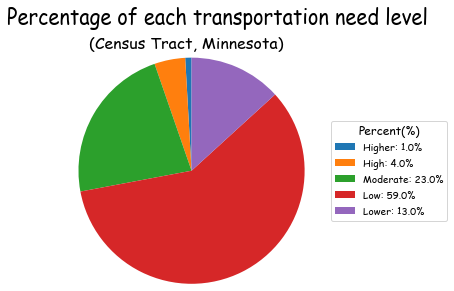

In [18]:
# Create a pie chart to see percentage of each transportation levels
colors = ["#ff3025", "#25ff51", "#3b25ff", "#ff9d25","#fff36d"]
value = percent_level_count(T_needs_index)

# Create a pie chart
plt.pie(value, startangle = 90, radius = 1.3)
# Create a title
plt.title("Percentage of each transportation need level", 
          {"fontsize" : 20, "fontname" : "Comic Sans MS"},
          x = 0.62, y = 1.15)
# Create a legend
legend = plt.legend(["Higher: {}%".format(round(value[0]*100)), 
                     "High: {}%".format(round(value[1]*100)), 
                     "Moderate: {}%".format(round(value[2]*100)), 
                     "Low: {}%".format(round(value[3]*100)),
                     "Lower: {}%".format(round(value[4]*100))], 
                    title="Percent(%)", loc="center right", 
                    bbox_to_anchor=(1.2, 0, 0.5, 1))
# Create a subtitle
plt.suptitle('(Census Tract, Minnesota)', fontsize = 16, x = 0.5, y = 0.97, fontname = "Comic Sans MS")

# Define properties of the legend
plt.setp(legend.get_title(), fontsize = 12, fontname = "Comic Sans MS")
plt.setp(legend.texts,fontsize = 10, fontname = "Comic Sans Ms")

# Plot the pie chart
plt.show()

- According to the pie chart, only 14 (1338 \* 1%) census tracts are in higher need level. More than half census tracts are in low or lower need level.  

A descriptive was is used to see which census tract receives the highest/lowest index and which county it is located in. 

In [19]:
T_needs_index.sort_values(by='Scaled_index', ascending=False, inplace = True)
for index, row in T_needs_index.iterrows():
    print("Census tract {0} has the highest transportation need index and it is in {1}.".format(row.GEOID, 
                                                                                                 row.GEOID[0:5]))
    break

Census tract 27053104800 has the highest transportation need index and it is in 27053.


- The census tract that has the highest index score is located in **_Hennepin_** county.

In [20]:
T_needs_index.sort_values(by='Scaled_index', ascending=True, inplace = True)
for index, row in T_needs_index.iterrows():
    print("Census tract {0} has the lowest transportation need index and it is in {1}.".format(row.GEOID, 
                                                                                                 row.GEOID[0:5]))
    break

Census tract 27031990000 has the lowest transportation need index and it is in 27031.


- The census tract that has the lowest index score is located in **_Cook_** county.

### 2.5 Create Index Table by County

Consider local authority might also be interested in exploring index at county level. Another index table by county is created based on the index table by census tract. 

In [21]:
# Read the csv file created above into the dataframe
df = pd.read_csv("Transportation Needs Index by census tract.csv", low_memory = False)


# The County FIP is one of the component of GEOID
# Convert GEOID type to string as index cannot be applies to intger
# Use index to slice the FIP out and add to a new list 
df["GEOID"] = df.astype("str")
county = [element[0:5] for element in list(df.GEOID)]

# Insert the list to the dataframe with assigned location and name
df.insert(1, "COUNTY_FIP", county)

# Create an empty dataframe
df1 = pd.DataFrame()

# Sum up the values in columns based on the same County_FIP
# For example, if the FIP is 001, sum the records in columns with FIP equals to 001
# Make the needed columns as a list and iterate over it
# Append resulting series to the empty dataframe and reset the index
for element in list(df.columns)[2:]:
    df1[element] = df.groupby("COUNTY_FIP")[element].sum()
df1.reset_index(inplace = True)


# Renormalize the indexes
for index in list(df1.columns)[2::2]:
    df1[index] = (df1[index] - df1[index].min()) / (df1[index].max() - df1[index].min())

# Display first row to check if the result is correct 
df1.head(1)

,COUNTY_FIP,Poverty,Poverty_index,S_P_Under_18,S_P_Under_18_index,No_Vehicle,No_Vehicle_index,Disabled,Disabled_index,Not_labor,Not_labor_index,Unemployed,Unemployed_index,Over_65,Over_65_index,Under_14,Under_14_index,Total_index,Scaled_index
0,27001,824,0.008046,666,0.008318,406,0.007169,2745,0.019112,6863,0.021393,6274,0.006882,4977,0.026738,2156,0.006998,8.761554,0.013334


In [22]:
# Save as a new csv file
df1.to_csv("data/Transportation Needs Index by county.csv", 
           index = False)

#### 2.5.1  Result Interpretation

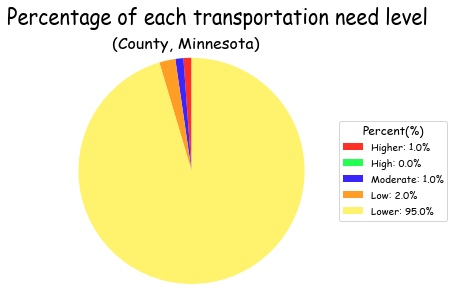

In [23]:
# Create a pie chart to see percentage of each transportation levels
colors = ["#ff3025", "#25ff51", "#3b25ff", "#ff9d25","#fff36d"]
value = percent_level_count(df1)

# Create a pie chart
plt.pie(value, startangle = 90, radius = 1.3, colors = colors)
# Create a title
plt.title("Percentage of each transportation need level", 
          {"fontsize" : 20, "fontname" : "Comic Sans MS"},
          x = 0.62, y = 1.15)
# Create a legend
legend = plt.legend(["Higher: {}%".format(round(value[0]*100)), 
                     "High: {}%".format(round(value[1]*100)), 
                     "Moderate: {}%".format(round(value[2]*100)), 
                     "Low: {}%".format(round(value[3]*100)),
                     "Lower: {}%".format(round(value[4]*100))], 
                    title="Percent(%)", loc="center right", 
                    bbox_to_anchor=(1.2, 0, 0.5, 1))
# Create a subtitle
plt.suptitle('(County, Minnesota)', fontsize = 16, x = 0.5, y = 0.97, fontname = "Comic Sans MS")

# Define properties of the legend
plt.setp(legend.get_title(), fontsize = 12, fontname = "Comic Sans MS")
plt.setp(legend.texts,fontsize = 10, fontname = "Comic Sans Ms")

# Plot the pie chart
plt.show()

- According to the pie chart, nearly all the counties are in the lower need level, this result points out lots low-mobility population groups are clustered in the same place, indicating the distribution of these groups is irregular and uneven. 

In [24]:
df1.sort_values(by='Scaled_index', ascending=False, inplace = True)
for index, row in df1.iterrows():
    print("{0} has the highest transportation need index.".format(row.COUNTY_FIP))
    break

27053 has the highest transportation need index.


- **_Hennepin_** county has the highest transportation need index.

In [25]:
df1.sort_values(by='Scaled_index', ascending=True, inplace = True)
for index, row in df1.iterrows():
    print("{0} has the lowest transportation need index.".format(row.COUNTY_FIP))
    break

27155 has the lowest transportation need index.


- **_Traverse_** county has the lowest transportation need index.

### 2.6 Reduce Census Tract and County Shapefile Size 

Since the shapefile size is large and will increase burden to visualize final maps, some tasks are taken to reduce their size by eliminating some unneeded columns.  

#### 2.6.1 Reduce Census Tact Shapefile

In [26]:
# Read the shapefile into the GeoDataframe
path = os.path.join("Data","MN_CT", "cb_2017_27_tract_500k.shp")
gdf = gpd.read_file(path)

# Silicing out the needed columns
gdf1 = gdf[["COUNTYFP", "GEOID", "geometry"]]

# Display first row to check if the result is correct 
gdf1.head(1)

,COUNTYFP,GEOID,geometry
0,003,27003050208,"POLYGON ((-93.35733 45.21961, -93.33643 45.219..."


In [ ]:
# Save as a new shapefile
gdf1.to_file("MN_CT_1.shp")

#### 2.6.2 Reduce County Shapefile

In [27]:
# Read the shapefile into the GeoDataframe
path = os.path.join("Data","County_Boundary","County_Boundaries_in_Minnesota.shp")
gdf2 = gpd.read_file(path)

# Covert the coordinate system from projected system to geograpic system
# The reason is that folium module can only interpret geographic coordinate system
gdf3 = gdf2.to_crs(epsg = 4269)

# Silicing out the needed columns
gdf4 = gdf3[["COUNTY_NAM", "COUNTY_FIP", "geometry"]]

# Display first row to check if the result is correct 
gdf4.head(1)

,COUNTY_NAM,COUNTY_FIP,geometry
0,Red Lake,125,"POLYGON ((-96.29203 47.96296, -96.28843 47.962..."


In [ ]:
# Save as a new shapefile
gdf4.to_file("MN_CN_1.shp")

### 2.7. Convert Shapefiles to TopoJSON usng Mapshaper 

Shapefiles are converted to TopoJSON format in order to further reduce their sizes and make it easier be read by `folium` module.

[Mapshaper](https://mapshaper.org/) website provides the functionality to convert shapefiles into different formats. 

### 2.8. Define Function to Display Index Maps

A function is created to prompt users to input their desired viewing geographical level and idex. The function will return the index map based on users' input.

In [28]:
# Define the function to visualize the result
def index_map():
    # Ask for geographical level and index
    scale_input = input("Please Enter the Desired Geographical Scale (county/census tract): ")
    # Create formatted string to limit the character in one line of code
    option1 = "overall/poverty/single parent with childern under 18/no vehicle/disabled/not labor/"
    option2 = "unemplyed/over 65/under 14"
    index_input = input("Please Enter the Index (%s%s): " %(option1, option2))

    # Lowercase and remove spaces in the strings
    scale = scale_input.lower().replace(" ","")
    index = index_input.lower().replace(" ","")
    
    # Create pattern object using re to check if input strings conform with the required inputs
    p = re.compile(r"\b(county|censustract)\b")
    p1 = re.compile(r"\b(overall|poverty|singleparentwithchildernunder18|novehicle|disabled|notlabor|unemployed|over65|under14)\b")
    if not re.match(p, scale):
        return "Please Enter Valid Scale String!"
    if not re.match(p1, index):
        return "Please Enter Valid Index String!"
    
    # Assign values to variables depending on input index
    if index == "overall":
        column1 = "Scaled_index"
        legend = "Transportation Needs Index"
        color = "BuGn"
    elif index == "poverty":
        column1 = "Poverty_index"
        legend = "Poverty Index"
        color = "BuPu"
    elif index == "singleparentwithchildrenunder18":
        column1 = "S_P_Under_18_index"
        legend = "Single Parent with Children under 18 Index"
        color = "OrRd"
    elif index == "novehicle":
        column1 = "No_Vehicle_index"
        legend = "No Vehicle Index"
        color = "PuRd"
    elif index == "disabled":
        column1 = "Disabled_index"
        legend = "Disabled Index"
        color = "YlGn"
    elif index == "notlabor":
        column1 = "Not_labor_index"
        legend = "Not Labor Index"
        color = "PuBuGn"
    elif index == "unemployed":
        column1 = "Unemployed_index"
        legend = "Unemployed Index"
        color = "YlGnBu"
    elif index == "over65":
        column1 = "Over_65_index"
        legend = "Over 65 Index"
        color = "YlOrBr"
    elif index == "under14":
        column1 = "Under_14_index"
        legend = "Under 14 Index"
        color = "YlOrRd"
    
    # Create a basemap based on the location of minnesota
    m = folium.Map(location = [46.729553, -94.685898], 
                   tiles = "https://cartodb-basemaps-{s}.global.ssl.fastly.net/dark_all/{z}/{x}/{y}.png", 
                   attr = "carto free map",
                   zoom_start = 6)
    
    # Display county or census tract map depend on users' input 
    if scale == "county":
        # Read the county index table into dataframe
        path = os.path.join("Data", 
                            "Transportation Needs Index by county.csv")
        df = pd.read_csv(path, low_memory = False)
        # Convert the data type to align with geo data type
        df["COUNTY_FIP"] = df.astype("str")
        # Update County_FIP code of table data to meet the format of geo data
        df["COUNTY_FIP"] = [element[2:5] for element in list(df.COUNTY_FIP)]
        # Open the Topojson file of county boundary
        fh = json.load(open("Data/MN_CN_1.json", "r"))
        
        # Plot a TopoJSON overlay to the map
        folium.Choropleth(geo_data = fh, 
                          data = df, 
                          columns = ["COUNTY_FIP",column1], 
                          key_on = 'feature.properties.COUNTY_FIP', 
                          fill_color = color, 
                          line_weight = 0.3, highlight = True, 
                          bins = 5, fill_opacity = 1, 
                          name = legend, 
                          legend_name = legend + " by county", 
                          topojson = "objects.MN_CN_1").add_to(m)       
    elif scale == "censustract":
        # Read the census tract index table into dataframe
        path = os.path.join("Data",
                            "Transportation Needs Index by census tract.csv")
        df = pd.read_csv(path, low_memory = False)
        # Convert the data type to align with geo data type
        df["GEOID"] = df.astype("str")
        # Open the Topojson file of census tract boundary
        fh = json.load(open("Data/MN_CT_1.json", "r"))
        
        # Plot a TopoJSON overlay to the map
        folium.Choropleth(geo_data = fh, 
                          data = df, 
                          columns = ["GEOID", column1], 
                          key_on = 'feature.properties.GEOID', 
                          fill_color = color,
                          line_weight = 0.1, highlight = True, 
                          bins = 5, fill_opacity = 1,
                          name = legend,
                          legend_name = legend + " by census tract", 
                          topojson = "objects.MN_CT_1").add_to(m)
    
    # Add layer control function to the map
    folium.LayerControl().add_to(m)
    return m

In [29]:
index_map()

Please Enter the Desired Geographical Scale (county/census tract): census tract
Please Enter the Index (overall/poverty/single parent with childern under 18/no vehicle/disabled/not labor/unemplyed/over 65/under 14): overall


- It can be seen from the map that census tracts in higher need level are located around the Metro city of Minnesota. Most of tracts in high and higher need level are in the eastern half of Minnesota. 

In [30]:
index_map()

Please Enter the Desired Geographical Scale (county/census tract): county
Please Enter the Index (overall/poverty/single parent with childern under 18/no vehicle/disabled/not labor/unemplyed/over 65/under 14): overall


- According to the map, it can find that Hennepin county is the only county classified in higher need level. Ramsey county has the moderate transportation need, Anoka and Dakota have the low transportation need, and the rest counties are all in lower need level. The total number of low-mobility population in Hennepin county is so large that make other counties receive relatively low index socre, making them classify in lower need level. 